In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df=pd.read_csv("../temp/maindfs/maindf.csv")

In [40]:
df.rename(columns={"personID_y": "cast"}, inplace=True)
df.drop(columns=["personID_x",'role'], inplace=True)

In [41]:
df.drop_duplicates(subset=['movieID'],inplace=True)
df.reset_index()

,index,movieID,title,year,runtime,genre,rating,votes,directors,writers,name,cast,category
0,0,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,1009.0,nm0846879,nm0846879,Charles Tait,"['nm0846887', 'nm0846894', 'nm1431224', 'nm300...","['actress', 'actor', 'actor', 'actor', 'actor'..."
1,2,tt0002101,Cleopatra,1912,100,"Drama,History",5.1,650.0,nm0309130,"nm0765026,nm0309130",Charles L. Gaskill,"['nm0306947', 'nm0801774', 'nm0276160', 'nm073...","['actress', 'actress', 'actress', 'actress', '..."
2,5,tt0002130,Dante's Inferno,1911,71,"Adventure,Drama,Fantasy",7.0,3875.0,"nm0078205,nm0655824,nm0209738",nm0019604,Francesco Bertolini,"['nm0660139', 'nm0685283', 'nm0209738', 'nm020...","['actor', 'actor', 'actor', 'actor', 'actor', ..."
3,9,tt0002199,From the Manger to the Cross,1912,71,"Biography,Drama",5.8,686.0,nm0646058,nm0310155,Sidney Olcott,"['nm0087381', 'nm0245769', 'nm0310155', 'nm039...","['actor', 'actor', 'actress', 'actress', 'acto..."
4,11,tt0002423,Passion,1919,113,"Biography,Drama,Romance",6.6,1087.0,nm0523932,"nm0266183,nm0473134",Ernst Lubitsch,"['nm0624470', 'nm0417837', 'nm0509573', 'nm090...","['actress', 'actor', 'actor', 'actor', 'actor'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64279,216005,tt9907782,The Cursed,2021,111,"Fantasy,Horror,Mystery",6.2,21260.0,nm1193346,nm1193346,Sean Ellis,"['nm2933542', 'nm0717709', 'nm0677944', 'nm364...","['actor', 'actress', 'actor', 'actress', 'acto..."
64280,216007,tt9908390,Le lion,2020,95,Comedy,5.5,1550.0,nm1415268,"nm0972375,nm1597688",Ludovic Colbeau-Justin,"['nm0200702', 'nm1081573', 'nm1446274', 'nm043...","['actor', 'actor', 'actress', 'actor', 'actres..."
64281,216010,tt9911196,The Marriage Escape,2020,103,"Comedy,Drama",7.4,3485.0,nm0631590,"nm2063122,nm0277932,nm0495599,nm3547655",Johan Nijenhuis,"['nm0277932', 'nm0824373', 'nm3362584', 'nm255...","['actor', 'actress', 'actress', 'actor', 'acto..."
64282,216015,tt9916270,Il talento del calabrone,2020,84,Thriller,5.8,1512.0,nm1480867,"nm1480867,nm10538402,nm5584269",Giacomo Cimini,"['nm0144812', 'nm3080119', 'nm2063290', 'nm942...","['actor', 'actor', 'actress', 'actress', 'actr..."


# Feature Engineering - "Critical Acclaim Score":

Explanation: Added a markdown cell explaining why a simple average rating can be misleading. I introduced the concept of the Bayesian average you implemented, framing it as a more robust metric that balances rating with popularity.

Observation: Interpreted the "before and after" comparison, pointing out that the new acclaim_score successfully filters out obscure, low-vote movies in favor of well-known, critically acclaimed classics.

In [42]:
df['primary_genre'] = df['genre'].apply(lambda g: g.split(',')[0] if isinstance(g, str) else (g[0] if g else 'Unknown'))

In [43]:
movie_df=df[['movieID','title','year','name','rating','votes','primary_genre']]
mean_rating=movie_df['rating'].mean()
votes_thresh=movie_df['votes'].quantile(0.80)

def new_rating(row,m,C):
    v = row['votes']
    R = row['rating']
    return (v / (v + m)) * R + (m / (v + m)) * C

movie_df['acclaim_score'] = movie_df.apply(new_rating, axis=1, m=votes_thresh, C=mean_rating)
movie_df.sort_values(by='acclaim_score', ascending=False, inplace=True)

C:\Users\vedan\AppData\Local\Temp\ipykernel_24984\4098724349.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['acclaim_score'] = movie_df.apply(new_rating, axis=1, m=votes_thresh, C=mean_rating)
C:\Users\vedan\AppData\Local\Temp\ipykernel_24984\4098724349.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.sort_values(by='acclaim_score', ascending=False, inplace=True)


In [44]:
movie_df

,movieID,title,year,name,rating,votes,primary_genre,acclaim_score
66287,tt0111161,The Shawshank Redemption,1994,Frank Darabont,9.3,3079063.0,Drama,9.290901
36976,tt0068646,The Godfather,1972,Francis Ford Coppola,9.2,2147583.0,Crime,9.187374
102269,tt0468569,The Dark Knight,2008,Christopher Nolan,9.1,3053530.0,Action,9.091394
76909,tt0167260,The Lord of the Rings: The Return of the King,2003,Peter Jackson,9.0,2097027.0,Adventure,8.987898
64419,tt0108052,Schindler's List,1993,Steven Spielberg,9.0,1538224.0,Biography,8.983526
...,...,...,...,...,...,...,...,...
197516,tt6038600,Smolensk,2016,Antoni Krauze,1.2,40367.0,Drama,2.064906
116640,tt10888594,Radhe,2021,Prabhu Deva,1.8,180856.0,Action,1.996348
204410,tt7221896,Cumali Ceber,2017,Gökhan Gök,1.0,39659.0,Comedy,1.913577
207704,tt7886848,Sadak 2,2020,Mahesh Bhatt,1.2,97018.0,Action,1.601469


In [52]:
directors=movie_df[['movieID', 'name', 'acclaim_score', 'primary_genre']]
director_stats=directors.groupby('name').agg(
    meanRating=('acclaim_score', 'mean'),
    stdRating=('acclaim_score', 'std'),
    count=('acclaim_score', 'count')
).reset_index()


In [53]:
director_stats=director_stats[director_stats['count'] > 4]

In [54]:
director_stats.sort_values(by='meanRating', ascending=False,inplace=True)
director_stats

,name,meanRating,stdRating,count
4454,Christopher Nolan,8.153195,0.632514,12
21803,Sergio Leone,7.809866,0.940475,7
19246,Quentin Tarantino,7.805968,0.786267,12
9027,Hayao Miyazaki,7.710792,0.574896,13
22566,Stanley Kubrick,7.693741,0.834983,13
...,...,...,...,...
12716,Kamil Çetin,4.952102,1.148464,9
23901,Togan Gökbakar,4.943155,0.606735,13
10201,James Nguyen,4.889506,1.326188,5
408,Ahmed Khan,4.696750,1.253690,5


<Axes: title={'center': 'Actual Director Ratings'}, xlabel='name'>

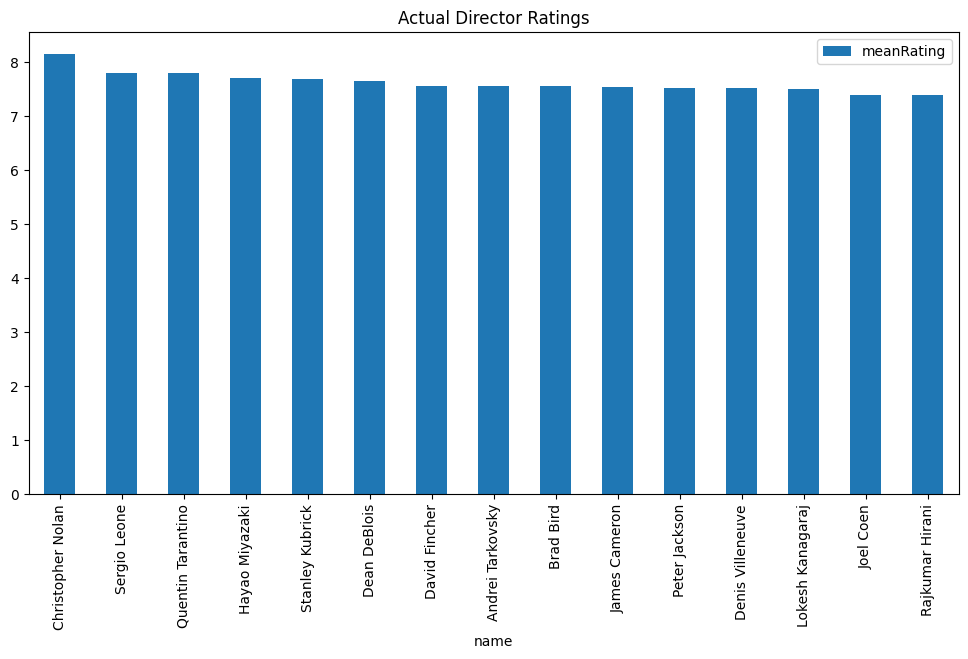

In [55]:
director_stats.head(15).plot(kind='bar', x='name', y='meanRating', figsize=(12, 6), title='Actual Director Ratings')

In [56]:
director_stats.head(15)['name']

4454     Christopher Nolan
21803         Sergio Leone
19246    Quentin Tarantino
9027        Hayao Miyazaki
22566      Stanley Kubrick
5776          Dean DeBlois
5493         David Fincher
1349      Andrei Tarkovsky
3135             Brad Bird
10100        James Cameron
18697        Peter Jackson
5895      Denis Villeneuve
14305     Lokesh Kanagaraj
11333            Joel Coen
19491      Rajkumar Hirani
Name: name, dtype: object

In [57]:
df[df['name']=='Christopher Nolan']

,movieID,title,year,runtime,genre,rating,votes,directors,writers,name,cast,category,primary_genre
75590,tt0154506,Following,1998,69,"Crime,Mystery,Thriller",7.4,106936.0,nm0634240,nm0634240,Christopher Nolan,"['nm0857458', 'nm0369918', 'nm0751301', 'nm063...","['actor', 'actor', 'actress', 'actor', 'actor'...",Crime
80164,tt0209144,Memento,2000,113,"Drama,Mystery,Thriller",8.4,1391481.0,nm0634240,"nm0634240,nm0634300",Christopher Nolan,"['nm0001602', 'nm0005251', 'nm0001592', 'nm009...","['actor', 'actress', 'actor', 'actor', 'actor'...",Drama
85590,tt0278504,Insomnia,2002,118,"Drama,Mystery,Thriller",7.2,332395.0,nm0634240,"nm0782711,nm0296154,nm0804408",Christopher Nolan,"['nm0000199', 'nm0000245', 'nm0005476', 'nm023...","['actor', 'actor', 'actress', 'actor', 'actor'...",Drama
93424,tt0372784,Batman Begins,2005,140,"Action,Crime,Drama",8.2,1661829.0,nm0634240,"nm0004170,nm0275286,nm0634240",Christopher Nolan,"['nm0000288', 'nm0000288', 'nm0000323', 'nm091...","['actor', 'actor', 'actor', 'actor', 'actor', ...",Action
102269,tt0468569,The Dark Knight,2008,152,"Action,Crime,Drama",9.1,3053530.0,nm0634240,"nm0634300,nm0634240,nm0275286,nm0004170",Christopher Nolan,"['nm0000288', 'nm0005132', 'nm0001173', 'nm000...","['actor', 'actor', 'actor', 'actor', 'actress'...",Action
103643,tt0482571,The Prestige,2006,130,"Drama,Mystery,Sci-Fi",8.5,1530957.0,nm0634240,"nm0634300,nm0634240,nm1793993",Christopher Nolan,"['nm0000288', 'nm0413168', 'nm0424060', 'nm000...","['actor', 'actor', 'actress', 'actor', 'actres...",Drama
106954,tt0816692,Interstellar,2014,169,"Adventure,Drama,Sci-Fi",8.7,2382690.0,nm0634240,"nm0634300,nm0634240",Christopher Nolan,"['nm0000190', 'nm0004266', 'nm1567113', 'nm323...","['actor', 'actress', 'actress', 'actress', 'ac...",Adventure
130045,tt1345836,The Dark Knight Rises,2012,164,"Action,Crime,Drama",8.4,1931541.0,nm0634240,"nm0634300,nm0634240,nm0275286,nm0004170",Christopher Nolan,"['nm0000288', 'nm0362766', 'nm0004266', 'nm000...","['actor', 'actor', 'actress', 'actor', 'actor'...",Action
131211,tt1375666,Inception,2010,148,"Action,Adventure,Sci-Fi",8.8,2712923.0,nm0634240,nm0634240,Christopher Nolan,"['nm0000138', 'nm0330687', 'nm0680983', 'nm091...","['actor', 'actor', 'actor', 'actor', 'actor', ...",Action
139046,tt15398776,Oppenheimer,2023,180,"Biography,Drama,History",8.3,920305.0,nm0634240,"nm0634240,nm3284831,nm2452558",Christopher Nolan,"['nm0614165', 'nm1289434', 'nm0000354', 'nm000...","['actor', 'actress', 'actor', 'actor', 'actor'...",Biography


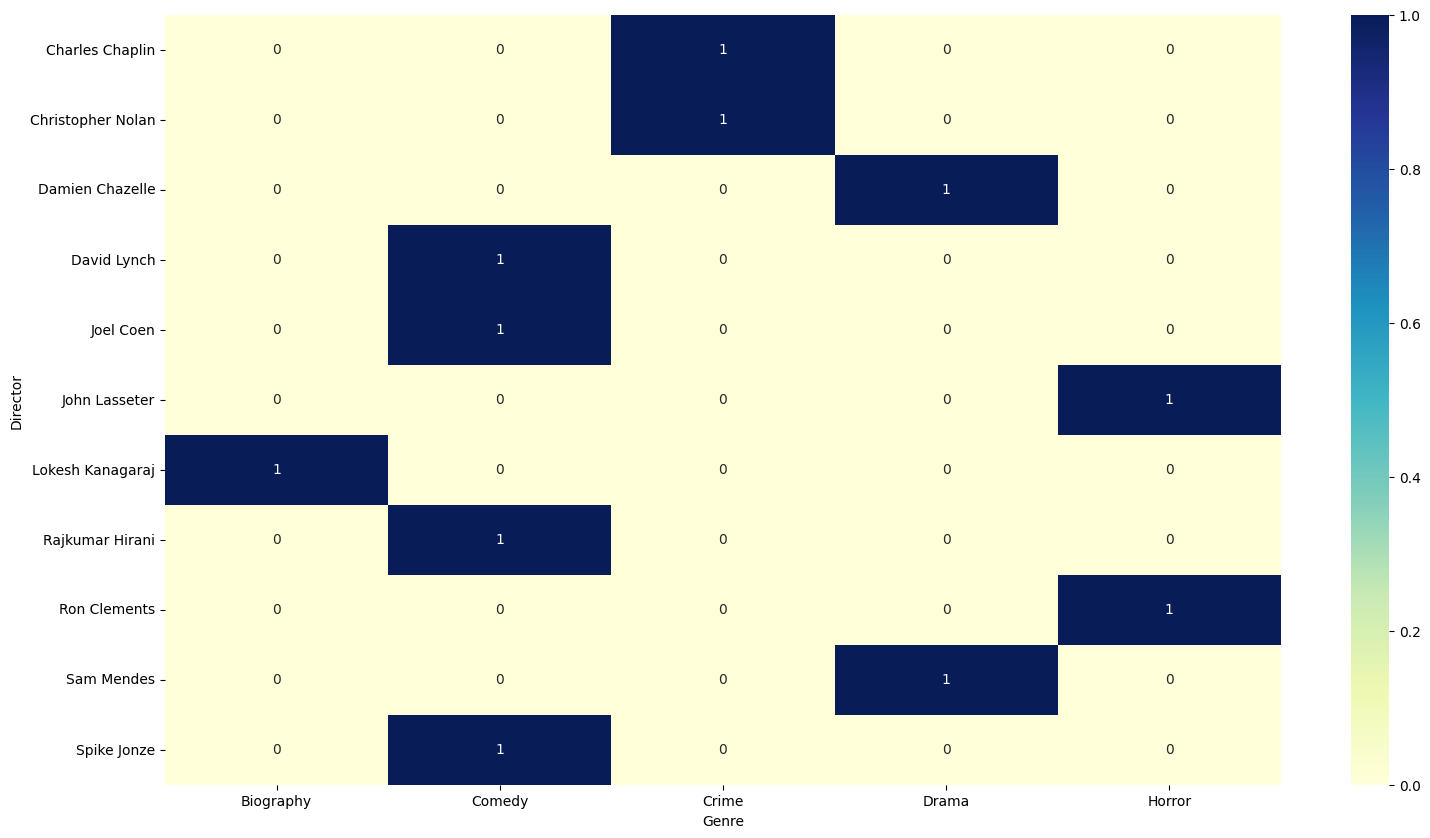

In [73]:
director_genre_crosstab = pd.crosstab(director_stats.head(35)['name'], df['primary_genre'])
plt.figure(figsize=(18, 10))
sns.heatmap(director_genre_crosstab, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('Genre')
plt.ylabel('Director')
plt.show()
